In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

Laboratory work 2

In [2]:
df = pd.read_csv('global_preprocessed.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

Shape of the database

In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df_not_balanced = df
df

The DataFrame has 171280 rows.
The DataFrame has 26 columns.


,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,-2.952239,0,0.095379,0.000000,-0.048337,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.952239,0,0.000000,0.000000,0.290024,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.952239,0,0.095379,0.000000,-0.048337,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171275,0.605588,0,0.095379,0.056697,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171276,0.605588,0,0.190758,0.198440,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171277,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171278,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The DataFrame (extended == 0) has 7939 rows.
The DataFrame (extended > 0) has 39695 rows.


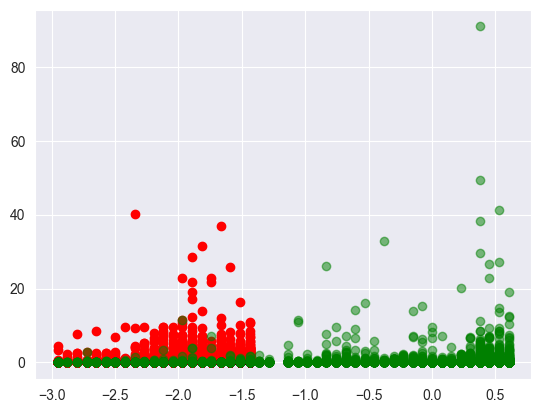

In [4]:
df1 = df[df.extended>0]
row_count = df1.shape[0]
print(f'The DataFrame (extended == 0) has {row_count} rows.')
df0 = df[df.extended==0][:row_count*5]
row_count = df0.shape[0]
print(f'The DataFrame (extended > 0) has {row_count} rows.')
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

In [5]:
df_new = pd.concat([df0, df1])
df = df_new
df

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,-2.952239,0,0.095379,0.0,-0.048337,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.952239,0,0.000000,0.0,0.290024,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.952239,0,0.095379,0.0,-0.048337,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.952239,0,0.000000,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.952239,0,0.000000,0.0,-0.048337,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171212,0.605588,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171221,0.605588,1,0.000000,0.0,0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171227,0.605588,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171245,0.605588,1,0.476895,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. Model training and parameter selection using Grid Search

Balanced dataset

In [6]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

Not balanced dataset

In [7]:
x_not_balanced = df_not_balanced.drop("extended", axis=1)
y_not_balanced = df_not_balanced['extended']
x_train_not_balanced, x_test_not_balanced, y_train_not_balanced, y_test_not_balanced = train_test_split(x_not_balanced, y_not_balanced, random_state=0)

a. K-nearest neighbors (KNN)

Not balanced

In [8]:
knn_not_balanced = KNeighborsClassifier(n_neighbors=100)
knn_not_balanced.fit(x_train_not_balanced, y_train_not_balanced)

KNeighborsClassifier(n_neighbors=100)

In [9]:
knn_not_balanced.score(x_test_not_balanced.values, y_test_not_balanced.values)

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9535730966837926

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth (For not balanced)')

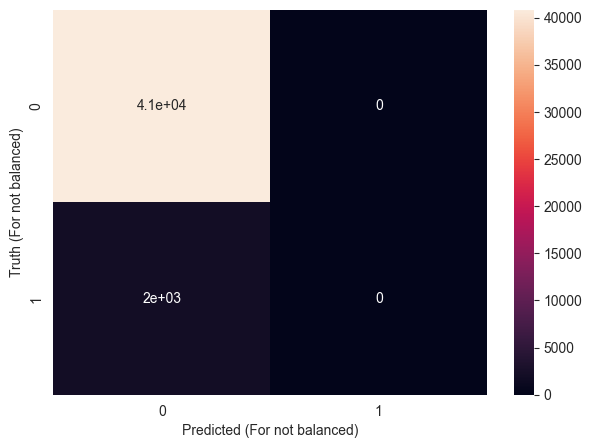

In [10]:
y_pred_not_balanced = knn_not_balanced.predict(x_test_not_balanced.values)
matrix = confusion_matrix(y_test_not_balanced, y_pred_not_balanced)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted (For not balanced)")
plt.ylabel("Truth (For not balanced)")

In [11]:
print(classification_report(y_test_not_balanced, y_pred_not_balanced))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     40832
           1       0.00      0.00      0.00      1988

    accuracy                           0.95     42820
   macro avg       0.48      0.50      0.49     42820
weighted avg       0.91      0.95      0.93     42820


D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Balanced

In [12]:
knn = GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 50, 100], 'algorithm': ['ball_tree', 'kd_tree', 'brute']})

#knn = KNeighborsClassifier(n_neighbors=100, algorithm="")
knn.fit(x_train, y_train)

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  File "D:\Programming\PycharmProjects\

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 50, 100]})

In [13]:
print(knn.score(x_test.values, y_test.values))
knn.best_params_

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.97648837014023


{'algorithm': 'kd_tree', 'n_neighbors': 10}

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

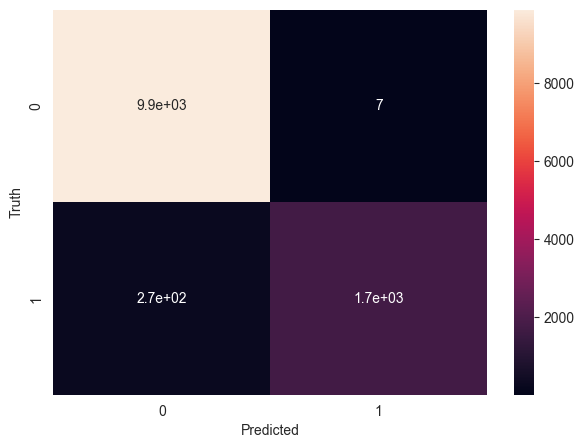

In [14]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9898
           1       1.00      0.86      0.93      2011

    accuracy                           0.98     11909
   macro avg       0.98      0.93      0.96     11909
weighted avg       0.98      0.98      0.98     11909


In [15]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

In [16]:
dump(knn, "knn_model.joblib") 

['knn_model.joblib']

b. Support Vector Classification (SVM)

In [17]:
model = GridSearchCV(estimator=SVC( class_weight='balanced'),  param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
model.fit(x_train,   y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [19]:
x_test = x_test.drop("Predicted", axis=1)
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
print(model.score(x_test, y_test))
model.best_params_

KeyError: "['Predicted'] not found in axis"

In [ ]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
x_test = x_test.drop("Predicted", axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
dump(model, "svm_model.joblib") 

c. Decision tree

In [ ]:
df = pd.read_csv('global_preprocessed_without_norm.csv', encoding='ISO-8859-1')
df1 = df[df.extended>0]
row_count = df1.shape[0]
df0 = df[df.extended==0][:row_count*5]
row_count = df0.shape[0]
df = pd.concat([df0, df1])

In [ ]:
df

In [ ]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
treeCl = DecisionTreeClassifier()
model = GridSearchCV(estimator=treeCl,  param_grid={'max_depth' : [2, 3, 10, 'None'], 'criterion': ['gini', 'entropy']})
model.fit(x_train, y_train)

In [ ]:
print(model.score(x_test, y_test))
model.best_params_

In [ ]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)
x_test = x_test.drop("Predicted", axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(25,20))
print(x_train)
plot_tree(model.best_estimator_, fontsize=12, feature_names=list(x_test.columns))

In [ ]:
dump(model, "tree_model.joblib") 